<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
PIXELS DATA ANALYSIS AND APPLY  PCA</h1>

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">
LIBRARIES</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">PCA LIBRARIES</h1>

In [2]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
train = pd.read_csv("train.csv")

In [4]:
test = pd.read_csv("test.csv")

In [5]:
print(test.shape)
print(train.shape)

(4209, 377)
(4209, 378)


In [6]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<h1 style="font-family:Arial; font-size:20px; color:#2C3E50; text-align:LEFT; background-color:#ECF0F1; padding:10px; border-radius:10px;">we want to remove all features that are either one or zero in 100% of the samples.</h1>

In [9]:
variance = VarianceThreshold(threshold=0)
train_data_withzero_var = variance.fit_transform(train.iloc[:,10:])

In [10]:
train_data_withzero_var.shape

(4209, 356)

In [11]:
type(train_data_withzero_var)

numpy.ndarray

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Label Encoder</h1>

In [12]:
label_data = train.iloc[:,2:10]

In [13]:
label_data

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [14]:
label = LabelEncoder()

In [15]:
for col in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    label_data[col] = label.fit_transform(label_data[col])

In [16]:
type(label_data)

pandas.core.frame.DataFrame

In [17]:
label_data

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
prepare train_data_withzero_var data into the data frame for module</h1>

In [18]:
train_data_withzero_var_final = pd.DataFrame(train_data_withzero_var)

In [19]:
train_data_withzero_var_final

,0,1,2,3,4,5,6,7,8,9,...,346,347,348,349,350,351,352,353,354,355
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Numeric data is converted to numpy array, categorical data is converted using label encoder but for concat both data we need to use ordinal encoder. </h1>

In [20]:
col_names= train.iloc[:,10:].columns[variance.get_support()]

In [21]:
data = pd.concat([label_data, pd.DataFrame(train_data_withzero_var, columns=col_names, index=label_data.index)], axis=1)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:left; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Train the model</h1>

In [22]:
x = data
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
x.shape

(4209, 364)

In [24]:
y = train['y']

In [25]:
y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

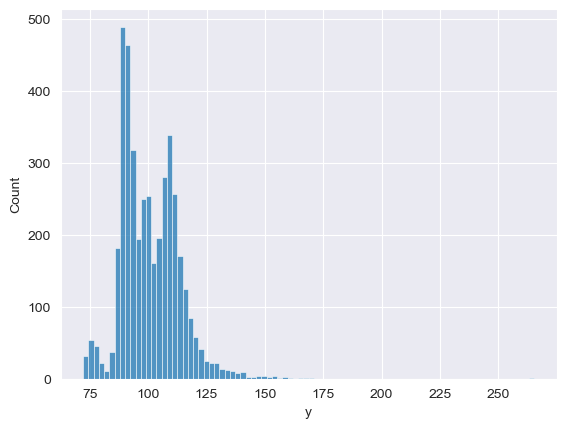

In [26]:
sns.histplot(y)
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
PCA</h1>

In [57]:
pca = PCA(n_components=0.9,copy=True, whiten=False,
          svd_solver='auto', tol=0.0, iterated_power='auto', 
          n_oversamples=10, power_iteration_normalizer='auto', random_state=None)

In [28]:
x_pca = pca.fit_transform(x)

In [29]:
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [31]:
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

In [32]:
grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='r2',   
    cv=3,          
    verbose=2,
    n_jobs=-1
)

In [33]:
x_train,x_test,y_train,y_test= train_test_split(x_pca,y,random_state=42, test_size =0.2)

In [34]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=3, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 500, 1000],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='r2', verbose=2)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
MODEL EVALUTION</h1>

In [36]:
y_pred = grid.predict(x_test)

In [37]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.41879939202072247
90.46383955330215


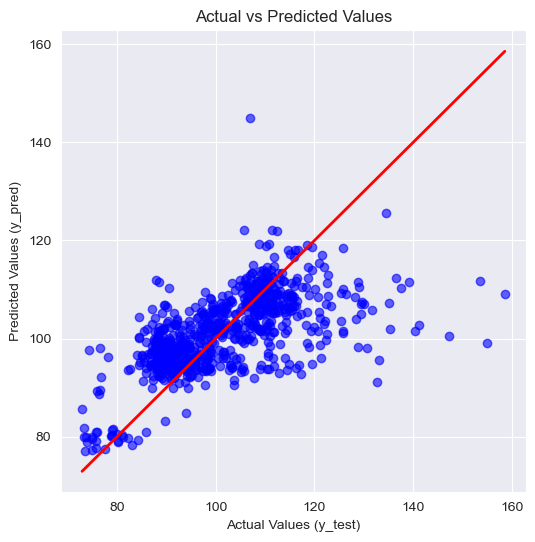

In [38]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)


plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color="red", linewidth=2)

plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs Predicted Values")
plt.show()

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
PROCESSING OF GIVEN TEST DATA</h1>

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Numeric data is converted to numpy array, categorical data is converted using label encoder but for concat both data we need to use ordinal encoder. </h1>

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [41]:
p1 = train.iloc[:,10:]

In [42]:
p1

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
p2 = train.iloc[:,:10]
p2 =p2.drop(['ID','y'], axis =1)

In [44]:
p2

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [45]:
p1 = variance.fit_transform(p1)
p1.shape

(4209, 356)

In [46]:
for col in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    le = LabelEncoder()
    p2[col] = le.fit_transform(p2[col])

In [47]:
test_data = pd.concat([p2, pd.DataFrame(p1, columns=col_names, index=label_data.index)], axis=1)

In [49]:
pca_data = pca.fit_transform(test_data)

<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
PREDICTING THE TEST DATA</h1>

In [51]:
ypred_test = grid.predict(pca_data)

In [52]:
ypred_test.shape

(4209,)

In [53]:
best_model = grid.best_estimator_
importances = best_model.feature_importances_

In [56]:
print(best_model, importances)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...) [0.3077517  0.2416499  0.14469002 0.16907537 0.136833  ]


<h1 style="font-family:Arial; font-size:32px; color:#2C3E50; text-align:center; background-color:#ECF0F1; padding:10px; border-radius:10px;">
Model achived 41% of accuracy in prediction. We have tried all changes in the model and data agumentation but still we have reached from 20 % to 59% of model accuracy. One method sampling can be implemeted for better predictino power</h1>